GTI770 - Systèmes Intelligents et Apprentissage Machine

Alessandro L. Koerich

Notebook Jupyter - 6a_Bayes_Regression 

May 2018

Rev. Oct 2018


This is our first notebook on REGRESSION, which, like classification, is a supervised learning task.


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# We need to generate some data to play with...
# So, we need to choose a function of form r = f(x), where r is the output (label) and x is the input (features)
# Example of functions: 
## r = x + 2
## r = x^2 + 2*x + 4
## r = sin(2*pi*x)
## or any other function of x that you may want to play with.
## So, let's use the cosine function: r = cos(6*pi*x)

def true_fun(X):
  return np.cos(6 * np.pi * X)

In [3]:
# So, using the function above, we will generate "training data" and "validation data"
# for example, 60 data points for training and 60 data points for test.
np.random.seed(0)
n_samples_train = 60
n_samples_test  = 60

# Let's generate random data points and compute the corresponding "label", that means "r" for each data point
X_train = np.sort(np.random.rand(n_samples_train))
X_test  = np.sort(np.random.rand(n_samples_test))

# Computing the corresponding "label", that means "r", for each generated data point in X 
r_train = true_fun(X_train)
r_test  = true_fun(X_test)

# Computing the corresponding "label", that means "r", for each generated data point in X but with a random noise added
r_train = true_fun(X_train) + np.random.randn(n_samples_train) * 0.2
r_test  = true_fun(X_test)  + np.random.randn(n_samples_test)  * 0.2


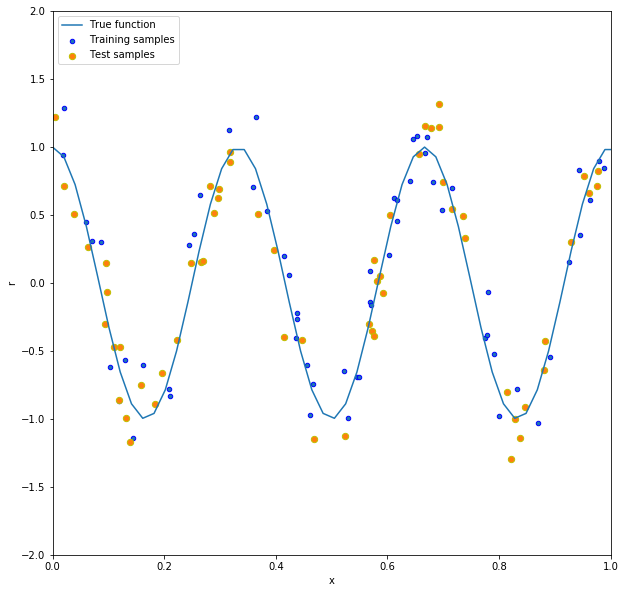

In [4]:
# Let's plot the data points...
# and also the function that we have used to generate them
plt.figure(figsize=(10, 10))

X_dummy = np.linspace(0, 2, 100)

plt.plot(X_dummy, true_fun(X_dummy), label="True function")

plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Training samples")
plt.scatter(X_test,  r_test,  edgecolor='y', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc='upper left')

plt.show()

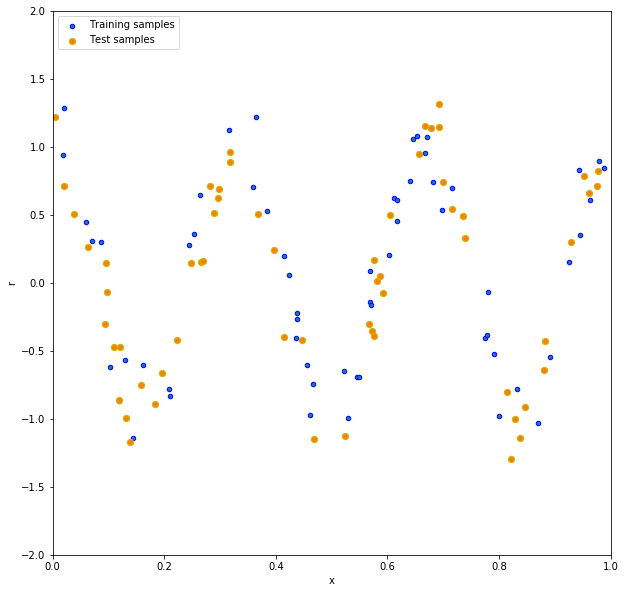

In [5]:
# Ok, now let's keep just the data points...

plt.figure(figsize=(10, 10))

X_dummy = np.linspace(0, 2, 100)

plt.scatter(X_train, r_train, edgecolor='b', s=20, label="Training samples")
plt.scatter(X_test,  r_test , edgecolor='y', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc='upper left')

plt.show()

In [6]:
# Compute the MSE metric for Regression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    # print('MSE: %2.5f' % mse)
    return mse

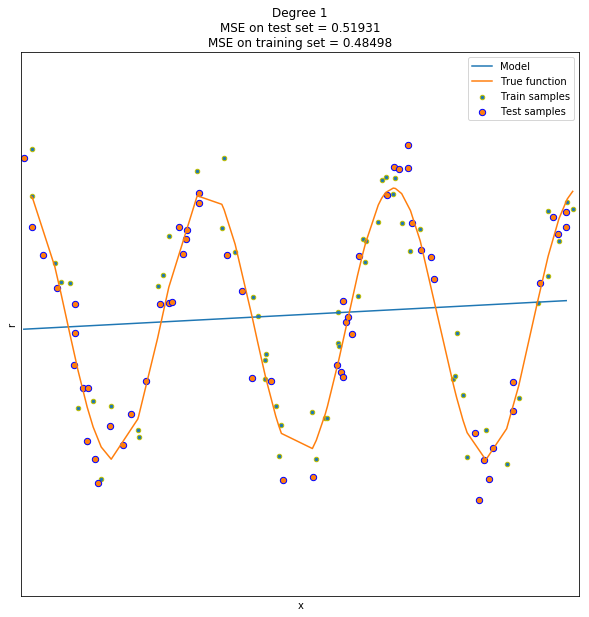

In [7]:
# Linear Regression
degrees = 1

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
linear_regression = LinearRegression()
pipeline = Pipeline([("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

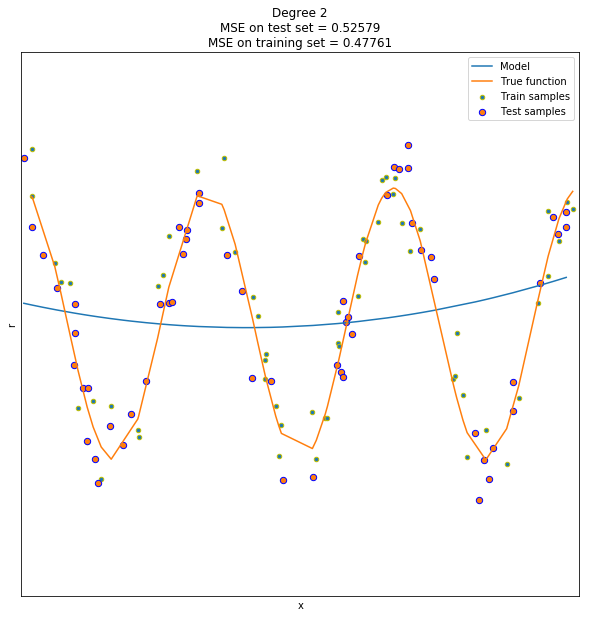

In [8]:
# Polinomial Regression 

degrees = 2
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

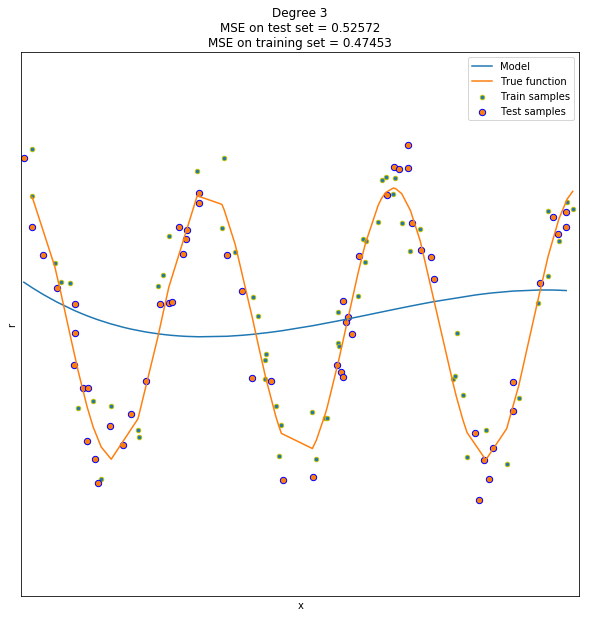

In [9]:
# Polinomial Regression
degrees = 3

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

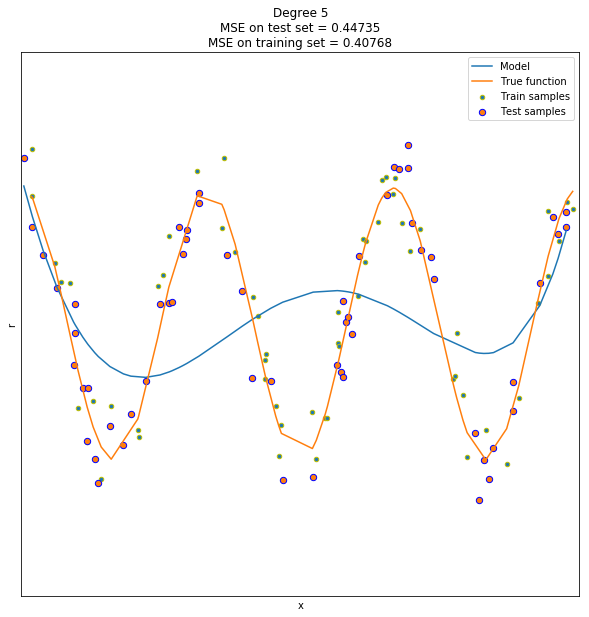

In [10]:
# Polinomial Regression
degrees = 5

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

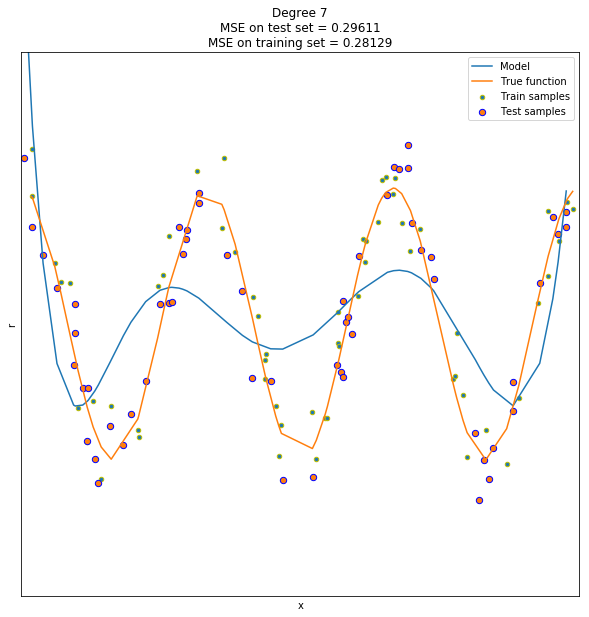

In [11]:
# Polinomial Regression
degrees = 7

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

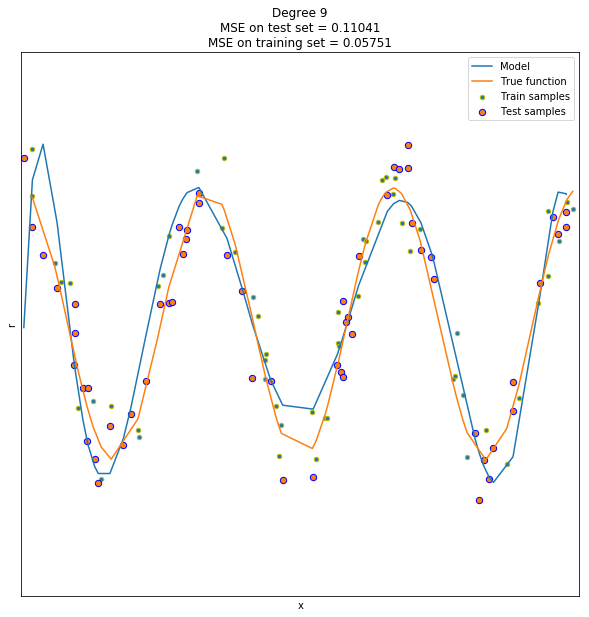

In [12]:
# Polinomial Regression
degrees = 9

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

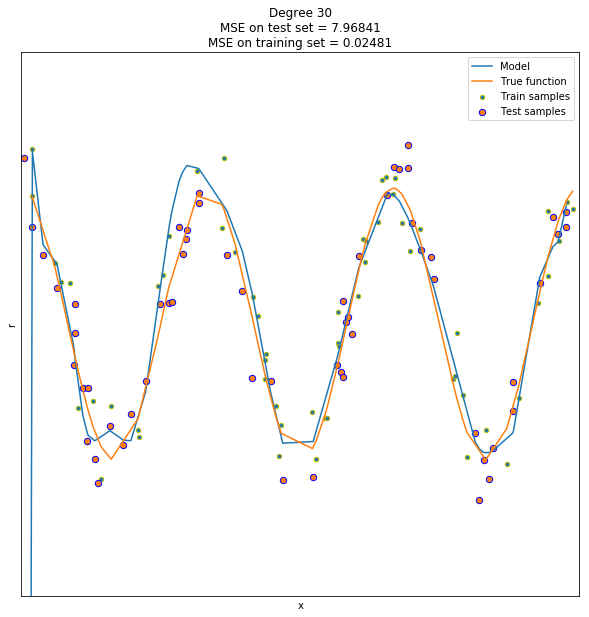

In [13]:
# Polinomial Regression
degrees = 30

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())
polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X_train[:, np.newaxis], r_train)

# Evaluate the models using the X_test samples
Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_train, true_fun(X_train), label="True function")

plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees, MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
plt.show()

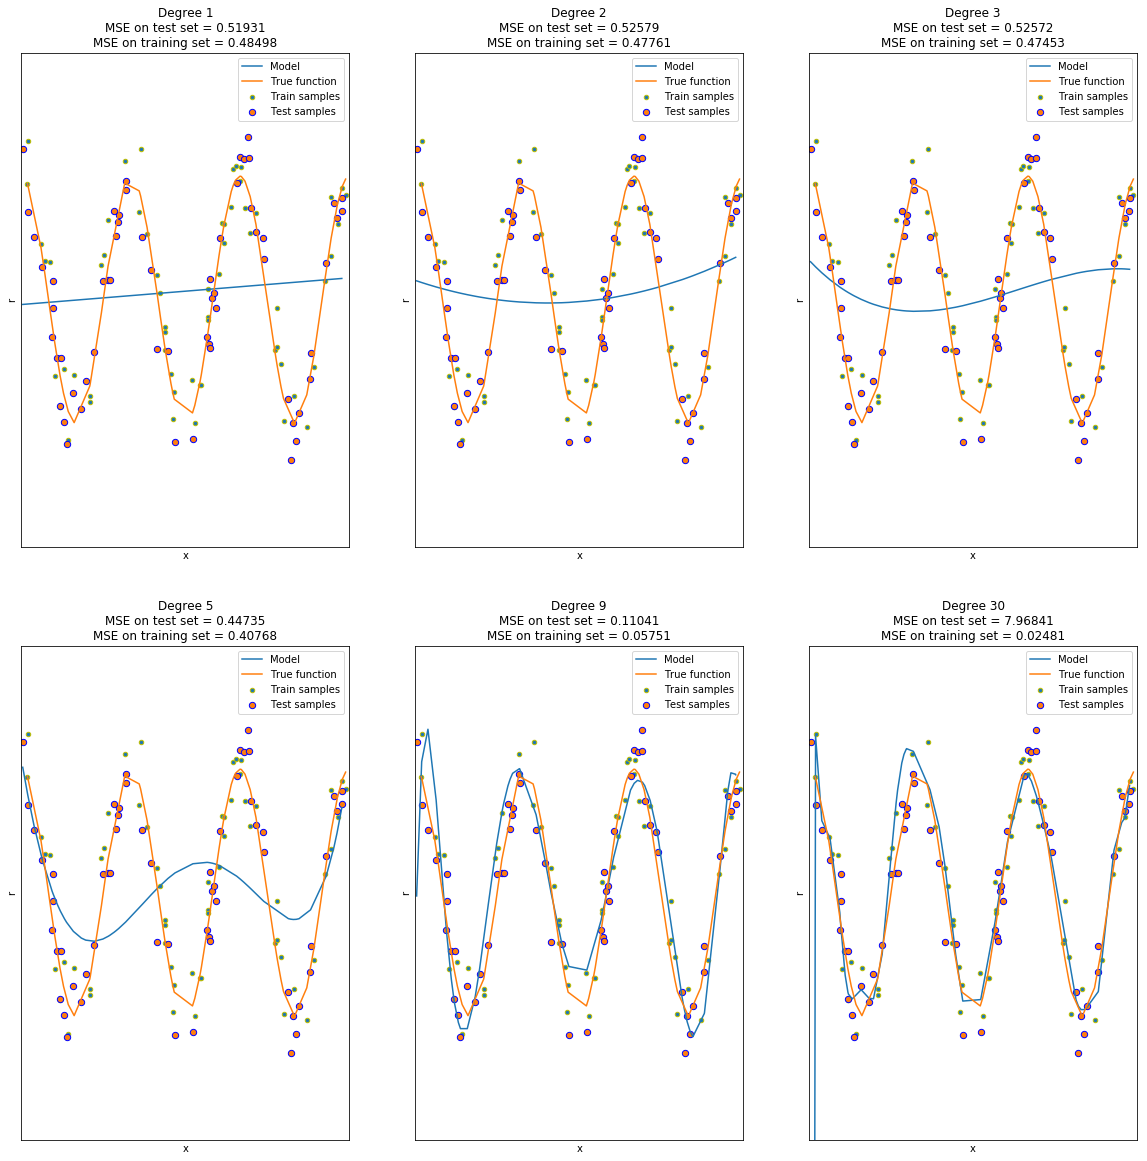

In [14]:
# Put all together in a single figure
degrees = [1, 2, 3, 5, 9, 30]

plt.figure(figsize=(20, 20))

for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], r_train)

    # Evaluate the models using the X_test samples
    Y_pred_test       = pipeline.predict(X_test[:, np.newaxis])
    Y_pred_train      = pipeline.predict(X_train[:, np.newaxis])

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_train, true_fun(X_train), label="True function")

    plt.scatter(X_train, r_train, edgecolor='y', s=20, label="Train samples")
    plt.scatter(X_test,  r_test,  edgecolor='b', s=40, label="Test samples")

    plt.xlabel("x")
    plt.ylabel("r")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE on test set = {:.5f}\nMSE on training set = {:.5f}".format(degrees[i], MSE(r_test,Y_pred_test), MSE(r_train,Y_pred_train)))
        
plt.show()

In [15]:
print("Notebook ended")

Notebook ended
